### Task 1, Team: Comparing US against 5 similarly sized countries

#### Comparing the countries United States, Indonesia, Pakistan, Nigeria, Brazil, and Bangladesh


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the dataframe of the deaths

In [38]:
df_deaths = pd.read_csv('data/cumulative-deaths-per-100k.csv')
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428419 entries, 0 to 428418
Data columns (total 7 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   Entity                                                             428419 non-null  object 
 1   Code                                                               402784 non-null  object 
 2   Day                                                                428419 non-null  object 
 3   Cumulative excess deaths per 100,000 people (central estimate)     55458 non-null   float64
 4   Cumulative excess deaths per 100,000 people (95% CI, lower bound)  55458 non-null   float64
 5   Cumulative excess deaths per 100,000 people (95% CI, upper bound)  55458 non-null   float64
 6   Total confirmed deaths due to COVID-19 per 100,000 people          427250 non-null  float64
dtypes: float64(4

Here we observe the dataset and have found column 0 (Entity/Country), 1 (Day/Date), and 6 (Total confirmed deaths) are of our interest

In [39]:
def country_deaths(country):
    return df_deaths.loc[(df_deaths['Entity']==country, df_deaths.columns[:])].loc[(df_deaths['Day']>'2020-05-31') & (df_deaths['Day']<'2021-01-04')].sort_values(by='Day')

country_deaths('Bangladesh')

,Entity,Code,Day,"Cumulative excess deaths per 100,000 people (central estimate)","Cumulative excess deaths per 100,000 people (95% CI, lower bound)","Cumulative excess deaths per 100,000 people (95% CI, upper bound)","Total confirmed deaths due to COVID-19 per 100,000 people"
32509,Bangladesh,BGD,2020-06-01,11.681056,-8.701433,18.71303,0.383741
32848,Bangladesh,BGD,2020-06-02,NaN,NaN,NaN,0.383741
32849,Bangladesh,BGD,2020-06-03,NaN,NaN,NaN,0.383741
32850,Bangladesh,BGD,2020-06-04,NaN,NaN,NaN,0.383741
32851,Bangladesh,BGD,2020-06-05,NaN,NaN,NaN,0.383741
...,...,...,...,...,...,...,...
33029,Bangladesh,BGD,2020-12-30,NaN,NaN,NaN,4.399448
33030,Bangladesh,BGD,2020-12-31,NaN,NaN,NaN,4.399448
33031,Bangladesh,BGD,2021-01-01,NaN,NaN,NaN,4.399448
33032,Bangladesh,BGD,2021-01-02,NaN,NaN,NaN,4.399448


Implemented a function to reduce repeated code, with these goals: 
- Select the country of interest by name
- Trim off date outside our scope
- Sort the dataframe by date

This plots the data per 100,000 people of the United States, Indonesia, Pakistan, Nigeria, Brazil, and Bangladesh. THis is because these countries have similar populations and call for a comparison.

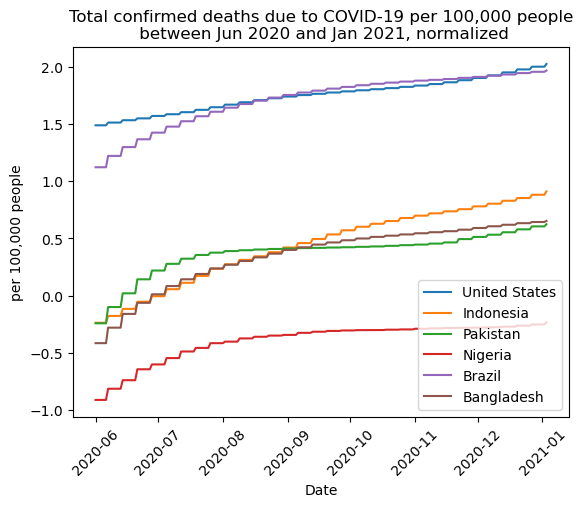

In [40]:
def draw_normalized(*countries):
    for country in countries:
        df = country_deaths(country)
        x = df.loc[:,'Day'].values
        x = np.asarray(x, dtype='datetime64[s]')
        y = np.log10(df.loc[:,df.columns[6]].values)
        plt.plot(x, y, label = country)
    plt.title("Total confirmed deaths due to COVID-19 per 100,000 people\n between Jun 2020 and Jan 2021, normalized")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.ylabel("per 100,000 people")
    plt.legend()
    plt.show()

draw_normalized('United States','Indonesia','Pakistan','Nigeria','Brazil','Bangladesh')

The data shoes that the United States and Brazil had a way more extreme death count compared to the other countries. Could be due to less restrictions and how the COVID-19 pandemic was handled.

Implemented a function to call the previous dataframe trimming function, normalize the data and then plot them on the graph. We are taking the new data and comparing 

In [41]:
df_confirmed = pd.read_csv('data/total-confirmed-cases-per-1m.csv')
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427250 entries, 0 to 427249
Data columns (total 4 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Entity                                                427250 non-null  object 
 1   Code                                                  401615 non-null  object 
 2   Day                                                   427250 non-null  object 
 3   Total confirmed cases of COVID-19 per million people  427250 non-null  float64
dtypes: float64(1), object(3)
memory usage: 13.0+ MB


Observing the dataset for confirmed cases per 1 million, found column 0, 1, 3 are of our interest

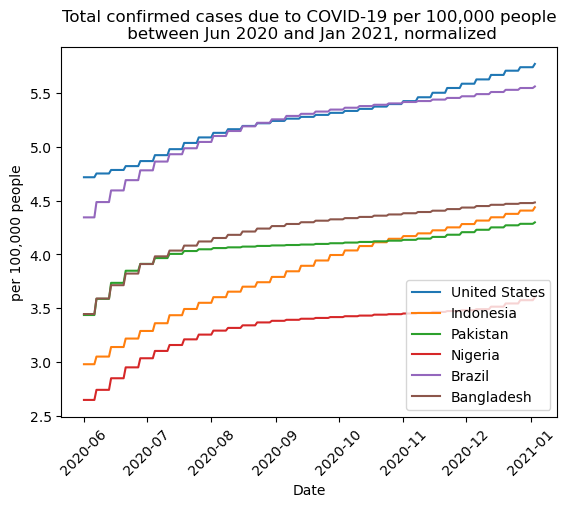

In [42]:
def country_confirmed(country):
    return df_confirmed.loc[(df_confirmed['Entity']==country, df_confirmed.columns[:])].loc[(df_confirmed['Day']>'2020-05-31') & (df_confirmed['Day']<'2021-01-04')].sort_values(by='Day')
def draw_normalized(*countries):
    for country in countries:
        df = country_confirmed(country)
        x = df.loc[:, 'Day'].values
        x = np.asarray(x, dtype='datetime64[s]')
        y = np.log10(df.loc[:, df.columns[3]].values * 10)
        plt.plot(x, y, label=country)
    plt.title("Total confirmed cases due to COVID-19 per 100,000 people\n between Jun 2020 and Jan 2021, normalized")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.ylabel("per 100,000 people")
    plt.legend()
    plt.show()


draw_normalized('United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh')

This data also shows the comparison between the 5 countries with the United States and Brazil in the lead with the most amount of cases. They are very similar in case counts, with the United States slightly leading. The country of Bangladesh also had a smaller case count, since it has been normalized it begs the question of why?

Took the same approach from plotting confirmed death to plot total confirmed cases. Note that the data was for "per 1 million people" so we x10 the data to get the desired "per 100k people" result